## SPAM Filter

**A SPAM-filtering dictionary is created, with 40 entries. (Each dictionary entry is a set of character
strings.) Twenty examples of SPAM and twenty examples of Ham were compared to the dictionary, yielding
a length-40 Boolean vector for each example. A component of the vector is true if the dictionary entry was
found in the sample. The file flagTrainSPAM.csv contains twenty length-40 Boolean flag vectors for SPAM,
and the file flagTrainHam.csv contains a similar number of flag vectors for the Ham samples. Training data
sets will be used to estimate the parameters for the classifier. Two additional files contain 1000 Boolean flag
vectors for each class of SPAM and Ham; these files will be used to evaluate the performance of your classifier.**

**Part 1: Provide code which loads the training and testing data from the provided files. Clearly comment your
code.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

#load training and testing data

#load train and test datasets for SPAM
flagTrainSPAM = pd.read_csv('./data/flagTrainSPAM.csv').iloc[:, 1:]
flagTestSPAM = pd.read_csv('./data/flagTestSPAM.csv').iloc[:, 1:]

#load train and test datasets for HAM
flagTrainHAM = pd.read_csv('./data/flagTrainHAM.csv').iloc[:, 1:]
flagTestHAM = pd.read_csv('./data/flagTestHAM.csv').iloc[:, 1:]

**Part 2: In this section, provide your code for computing the minimal sufficient statistics from the training data needed to estimate the classifier parameters. Compute the minimal sufficient statistics needed to classify the testing data.**

In [2]:
#computing the minimal sufficient statistics to estimate classifier parameters

#columnwise sum of 40 vectors for sufficient statistics
colSumTrainSPAM = flagTrainSPAM.sum(axis=0)
colSumTestSPAM = flagTestSPAM.sum(axis=0)
colSumTrainHAM = flagTrainHAM.sum(axis=0)
colSumTestHAM = flagTestHAM.sum(axis=0)

#number of rows in each dataset
nrowTrainSPAM = flagTrainSPAM.shape[0]
nrowTestSPAM = flagTestSPAM.shape[0]
nrowTrainHAM = flagTrainHAM.shape[0]
nrowTestHAM = flagTestHAM.shape[0]

**Part 3: Provide your code to compute the classifier parameter estimates in two ways: Maximum Likelihood
Estimation and Maximum A Posteriori Estimation. Provide side-by-side plots displaying points plots of Ham
parameter estimates on the left, and SPAM parameter estimates on the right. For each plot, display the 40
entry hit probabilities for MLE in red points, and MAP in green points. Clearly label your plots and provide
a legend for each.**

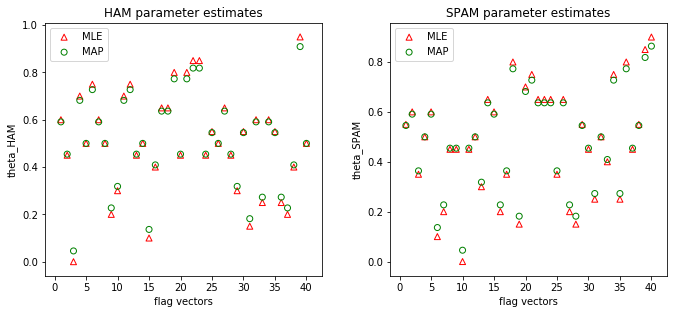

In [3]:
#compute MLE, MAP and plot parameter estimates for HAM & SPAM

#compute MLE parameter estimates
mleSPAM = colSumTrainSPAM / nrowTrainSPAM
mleHAM = colSumTrainHAM / nrowTrainHAM

#compute MAP parameter estimates
mapSPAM = (colSumTrainSPAM + 1 )/ (nrowTrainSPAM + 2)
mapHAM = (colSumTrainHAM + 1) / (nrowTrainHAM + 2)

#plot HAM parameter estimates
datalen = flagTrainSPAM.shape[1] + 1
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.scatter(range(1,datalen,1), mleHAM, marker='^', facecolors='none', edgecolors='r')
plt.scatter(range(1,datalen,1), mapHAM, marker='o', facecolors='none', edgecolors='g')
plt.title('HAM parameter estimates')
plt.ylabel('theta_HAM')
plt.xlabel('flag vectors')
plt.legend(["MLE", "MAP"])

#plot SPAM parameter estimates
plt.subplot(1, 2, 2)
plt.scatter(range(1,datalen,1), mleSPAM, marker='^', facecolors='none', edgecolors='r')
plt.scatter(range(1,datalen,1), mapSPAM, marker='o', facecolors='none', edgecolors='g')
plt.title('SPAM parameter estimates')
plt.ylabel('theta_SPAM')
plt.xlabel('flag vectors')
plt.legend(["MLE", "MAP"],loc='upper left')

plt.tight_layout(pad=3.0)

plt.show()

**Part 4: Provide your code to compute the logarithm of the ratio of the A Posteriori probabilities (LAPPR) of SPAM
(numerator) vs Ham for all testing data.**

In [4]:
#compute the Logarithm of the ratio of A Posteriori Probabilities of SPAM vs Ham

#log ratio of hits
hitRatio = []
for i in range(len(mapSPAM)):
    hitRatio.append(math.log(mapSPAM[i] / mapHAM[i]))

#log ratio of misses
missRatio = []
for i in range(len(mapSPAM)):
    missRatio.append(math.log((1-mapSPAM[i]) / (1-mapHAM[i])))
    
#LAPPR computation
logAppSPAM = []
logAppHAM = []
for i in range(flagTestSPAM.shape[0]):
    logAppSPAM.append(sum( (flagTestSPAM.iloc[i]+1)* hitRatio + (2-flagTestSPAM.iloc[i]) * missRatio))
    logAppHAM.append(sum( (flagTestHAM.iloc[i]+1)* hitRatio + (2-flagTestHAM.iloc[i]) * missRatio)) 

**Part 5: Provide histograms of the LAPPR in side-by-side plots with SPAM testing files on the left and Ham files on
the right. Use 100-bins in the histograms, coloring the SPAM histogram green and the Ham histogram red.**

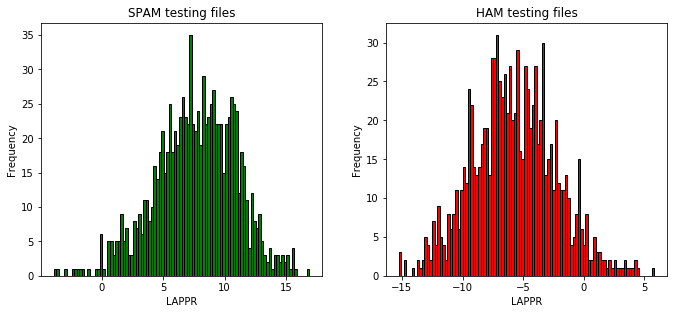

In [5]:
#histogram of Logarithm of the ratio of A Posteriori Probabilities

#SPAM histogram with 100 bins
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist(logAppSPAM, bins = 100, color = 'green', edgecolor='black')
plt.title('SPAM testing files')
plt.ylabel('Frequency')
plt.xlabel('LAPPR')

#HAM histogram with 100 bins
plt.subplot(1, 2, 2)
plt.hist(logAppHAM, bins = 100, color = 'red', edgecolor='black')
plt.title('HAM testing files')
plt.ylabel('Frequency')
plt.xlabel('LAPPR')

plt.tight_layout(pad=3.0)

plt.show()

**Part 6: Compute the error rates for SPAM testing files and Ham testing files.**

In [6]:
#error rates for SPAM testing files & HAM testing files

#SPAM error
arr1 = np.array(logAppSPAM)
output1 = np.where(arr1 < 0)[0]
errorSPAM = len(output1)/nrowTestSPAM
print('error rates for SPAM testing files : ',errorSPAM)

#HAM error
arr2 = np.array(logAppHAM)
output2 = np.where(arr2 > 0)[0]
errorHAM = len(output2)/nrowTestHAM
print('error rates for HAM testing files : ',errorHAM)

error rates for SPAM testing files :  0.016
error rates for HAM testing files :  0.049
